In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from scipy import stats, integrate
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns
sns.set(color_codes=True)


In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [10]:
h = pd.read_csv('DENUE_2016_v2.csv',index_col=0)
h.head(2)

C:\Users\David Mayer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,4,15,19,26,27,29,31,34,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
﻿D_R,,,,,,,,,,,,,,,,,,,,,
,6281424,PASTEURIZADORA AGUASCALIENTES S.A. DE C.V. OF...,PASTEURIZADORA AGUASCALIENTES S.A. DE C.V.,431160,Comercio al por mayor de leche y otros product...,0 a 5 personas,AVENIDA,CONVENCI+ôN DE 1914 NORTE,CALLE,GENERAL IGNACIO ZARAGOZA,...,AGUASCALIENTES,0303,025,,ADELGADILLOE@GILSA.COM.MX,,Fijo,21.8990324,-102.298925,JULIO 2010
,2671,SERVICIO DE ESTRUCTURA,,332320,Fabricaci+¦n de productos de herrer+¡a,6 a 10 personas,CALLE,ARROYO DEL SALTO,CALLE,ARROYO DEL CALVARIO,...,JES+ÜS MAR+ìA,0158,001,4499650500,,,Fijo,21.96936891,-102.339689,JULIO 2010


In [11]:
h.drop(h.columns[[1,2]],1,inplace=True)
h.drop(h.columns[[2,4,5,6,7,8,9,10]],1,inplace=True) 
h.drop(h.columns[[3,4,5,6,7,8,9,10]],1,inplace=True) 
h.drop(h.columns[[3,4,5,6,7,9]],1,inplace=True) 
h.drop(h.columns[[5,7,8,9,10,11,12,13,14,15,16]],1,inplace=True) 
h.head(2)

,id,codigo_act,per_ocu,cve_ent,cve_mun,cve_loc
﻿D_R,,,,,,
,6281424,431160,0 a 5 personas,1,1,1
,2671,332320,6 a 10 personas,1,5,1


In [12]:
h.reset_index(inplace=True)
h.columns=['D_R','id','codigo_act','per_ocu','ent','mun','cve_loc']
del h['D_R']
del h['cve_loc']
h.head(2)


,id,codigo_act,per_ocu,ent,mun
0,6281424,431160,0 a 5 personas,1,1
1,2671,332320,6 a 10 personas,1,5


In [13]:
h.ix[h.per_ocu=='0 a 5 personas','EmpLevel']=1
h.ix[h.per_ocu=='6 a 10 personas','EmpLevel']=2
h.ix[h.per_ocu=='11 a 30 persona','EmpLevel']=3
h.ix[h.per_ocu=='31 a 50 persona','EmpLevel']=4
h.ix[h.per_ocu=='51 a 100 person','EmpLevel']=5
h.ix[h.per_ocu=='101 a 250 perso','EmpLevel']=6
h.ix[h.per_ocu=='251 y m+ís pers','EmpLevel']=7
h.dropna(subset = ['EmpLevel'])
len(h)

4928225

In [14]:
h=h.apply(pd.to_numeric, errors='coerce')
del h['per_ocu']
len(h)

4928225

In [15]:
h.head()

,id,codigo_act,ent,mun,EmpLevel
0,6281424.0,431160.0,1.0,1.0,1.0
1,2671.0,332320.0,1.0,5.0,2.0
2,6142422.0,237212.0,1.0,6.0,2.0
3,650.0,327399.0,1.0,3.0,1.0
4,3354.0,434312.0,1.0,5.0,1.0


In [17]:
h=h.dropna(subset=['codigo_act'])
h=h.dropna(subset=['ent'])
h=h.dropna(subset=['mun'])
h=h.astype(int)
h.head()

,id,codigo_act,ent,mun,EmpLevel
0,6281424,431160,1,1,1
1,2671,332320,1,5,2
2,6142422,237212,1,6,2
3,650,327399,1,3,1
4,3354,434312,1,5,1


In [18]:
h.describe()

,id,codigo_act,ent,mun,EmpLevel
count,4.924092e+06,4.924092e+06,4.924092e+06,4.924092e+06,4.924092e+06
mean,2.566539e+06,5.539830e+05,1.645805e+01,5.227991e+01,1.220555e+00
std,1.607631e+06,1.631460e+05,7.728507e+00,6.621317e+01,7.098380e-01
min,1.000000e+00,1.125110e+05,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.239178e+06,4.611100e+05,1.100000e+01,1.300000e+01,1.000000e+00
50%,2.475442e+06,4.662120e+05,1.500000e+01,3.300000e+01,1.000000e+00
75%,3.714125e+06,7.225130e+05,2.100000e+01,7.000000e+01,1.000000e+00
max,6.469038e+06,9.321100e+05,3.200000e+01,5.700000e+02,7.000000e+00


In [19]:
h.to_csv('D16id.csv')

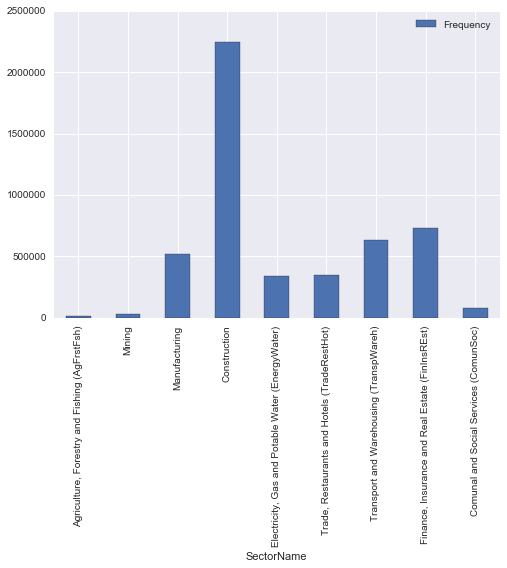

In [75]:
acts=h.Sector.value_counts().sort_index()
#acts.plot(kind='bar')
s = pd.Series(['0','Agriculture, Forestry and Fishing (AgFrstFsh)','Mining','Manufacturing','Construction','Electricity, Gas and Potable Water (EnergyWater)','Trade, Restaurants and Hotels (TradeRestHot)','Transport and Warehousing (TranspWareh)','Finance, Insurance and Real Estate (FinInsREst)','Comunal and Social Services (ComunSoc)'])
aa=acts.to_frame()
aa['SectorName']=s
aa.set_index('SectorName')
aa.columns = ['Frequency','SectorName']
aa.plot(x='SectorName',y='Frequency',kind='bar')


In [76]:
aa[['SectorName','Frequency']]

,SectorName,Frequency
1,"Agriculture, Forestry and Fishing (AgFrstFsh)",11244
2,Mining,28052
3,Manufacturing,515324
4,Construction,2245892
5,"Electricity, Gas and Potable Water (EnergyWater)",337909
6,"Trade, Restaurants and Hotels (TradeRestHot)",344543
7,Transport and Warehousing (TranspWareh),630544
8,"Finance, Insurance and Real Estate (FinInsREst)",728749
9,Comunal and Social Services (ComunSoc),81835


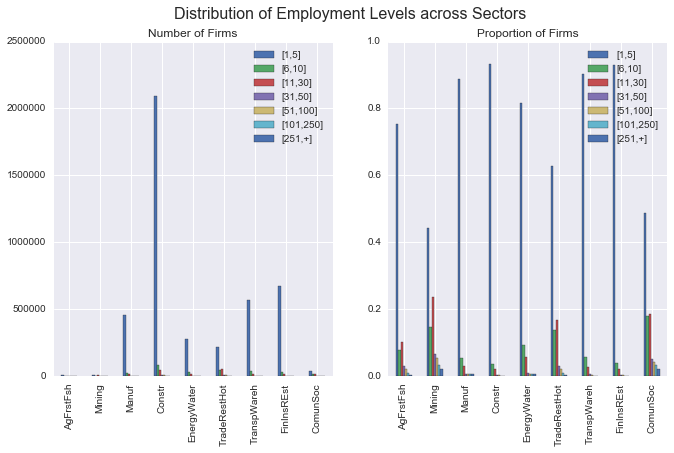

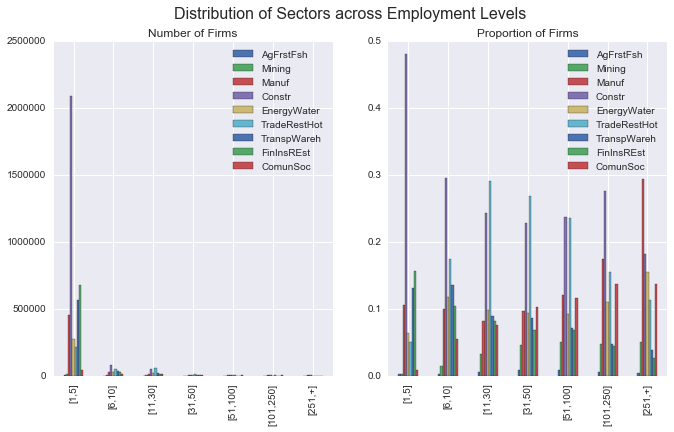

In [78]:
Freqact=h.groupby([h.EmpLevel,h.Sector]).size().to_frame(name = 'num').reset_index()
Fp=Freqact.pivot('Sector','EmpLevel','num')
Fp.index=['AgFrstFsh','Mining','Manuf','Constr','EnergyWater','TradeRestHot','TranspWareh','FinInsREst','ComunSoc'] 
Fp.columns=['[1,5]','[6,10]','[11,30]','[31,50]','[51,100]','[101,250]','[251,+]'] 
fig, axes = plt.subplots(1,2,figsize=(11,6))
fig.suptitle("Distribution of Employment Levels across Sectors", fontsize=16)
Fp[['[1,5]','[6,10]','[11,30]','[31,50]','[51,100]','[101,250]','[251,+]']].plot(ax=axes[0],kind='bar'); axes[0].set_title('Number of Firms');
Fp.apply(lambda x: x / sum(x), axis=1).plot(ax=axes[1],kind='bar'); axes[1].set_title('Proportion of Firms');
plt.show()
Fp2=Freqact.pivot('EmpLevel','Sector','num')
Fp2.columns=['AgFrstFsh','Mining','Manuf','Constr','EnergyWater','TradeRestHot','TranspWareh','FinInsREst','ComunSoc'] 
Fp2.index=['[1,5]','[6,10]','[11,30]','[31,50]','[51,100]','[101,250]','[251,+]'] 
fig, axes = plt.subplots(1,2,figsize=(11,6))
print('\n')
fig.suptitle("Distribution of Sectors across Employment Levels", fontsize=16)
Fp2[['AgFrstFsh','Mining','Manuf','Constr','EnergyWater','TradeRestHot','TranspWareh','FinInsREst','ComunSoc']].plot(ax=axes[0],kind='bar'); axes[0].set_title('Number of Firms');
Fp2.apply(lambda x: x / sum(x), axis=1).plot(ax=axes[1],kind='bar'); axes[1].set_title('Proportion of Firms');
plt.show()


In [82]:
Fp.index=['AgFrstFsh','Mining','Manuf','Constr','EnergyWater','TradeRestHot','TranspWareh','FinInsREst','ComunSoc'] 
Fp.columns=['[1,5]','[6,10]','[11,30]','[31,50]','[51,100]','[101,250]','[251,+]'] 
print(Fp)

                [1,5]  [6,10]  [11,30]  [31,50]  [51,100]  [101,250]  [251,+]
AgFrstFsh        8469     869     1136      360       255        108       47
Mining          12436    4095     6617     1844      1507        923      630
Manuf          457041   27430    16297     3872      3659       3361     3664
Constr        2092452   80935    48617     9172      7132       5314     2270
EnergyWater    275572   32035    19721     3738      2792       2111     1940
TradeRestHot   216386   47639    58222    10797      7092       2990     1417
TranspWareh    568424   37114    18021     3447      2156        908      474
FinInsREst     677648   28600    16500     2773      2043        853      332
ComunSoc        39833   14858    15170     4122      3508       2643     1701


C:\Users\DavidMayerF\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\DavidMayerF\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


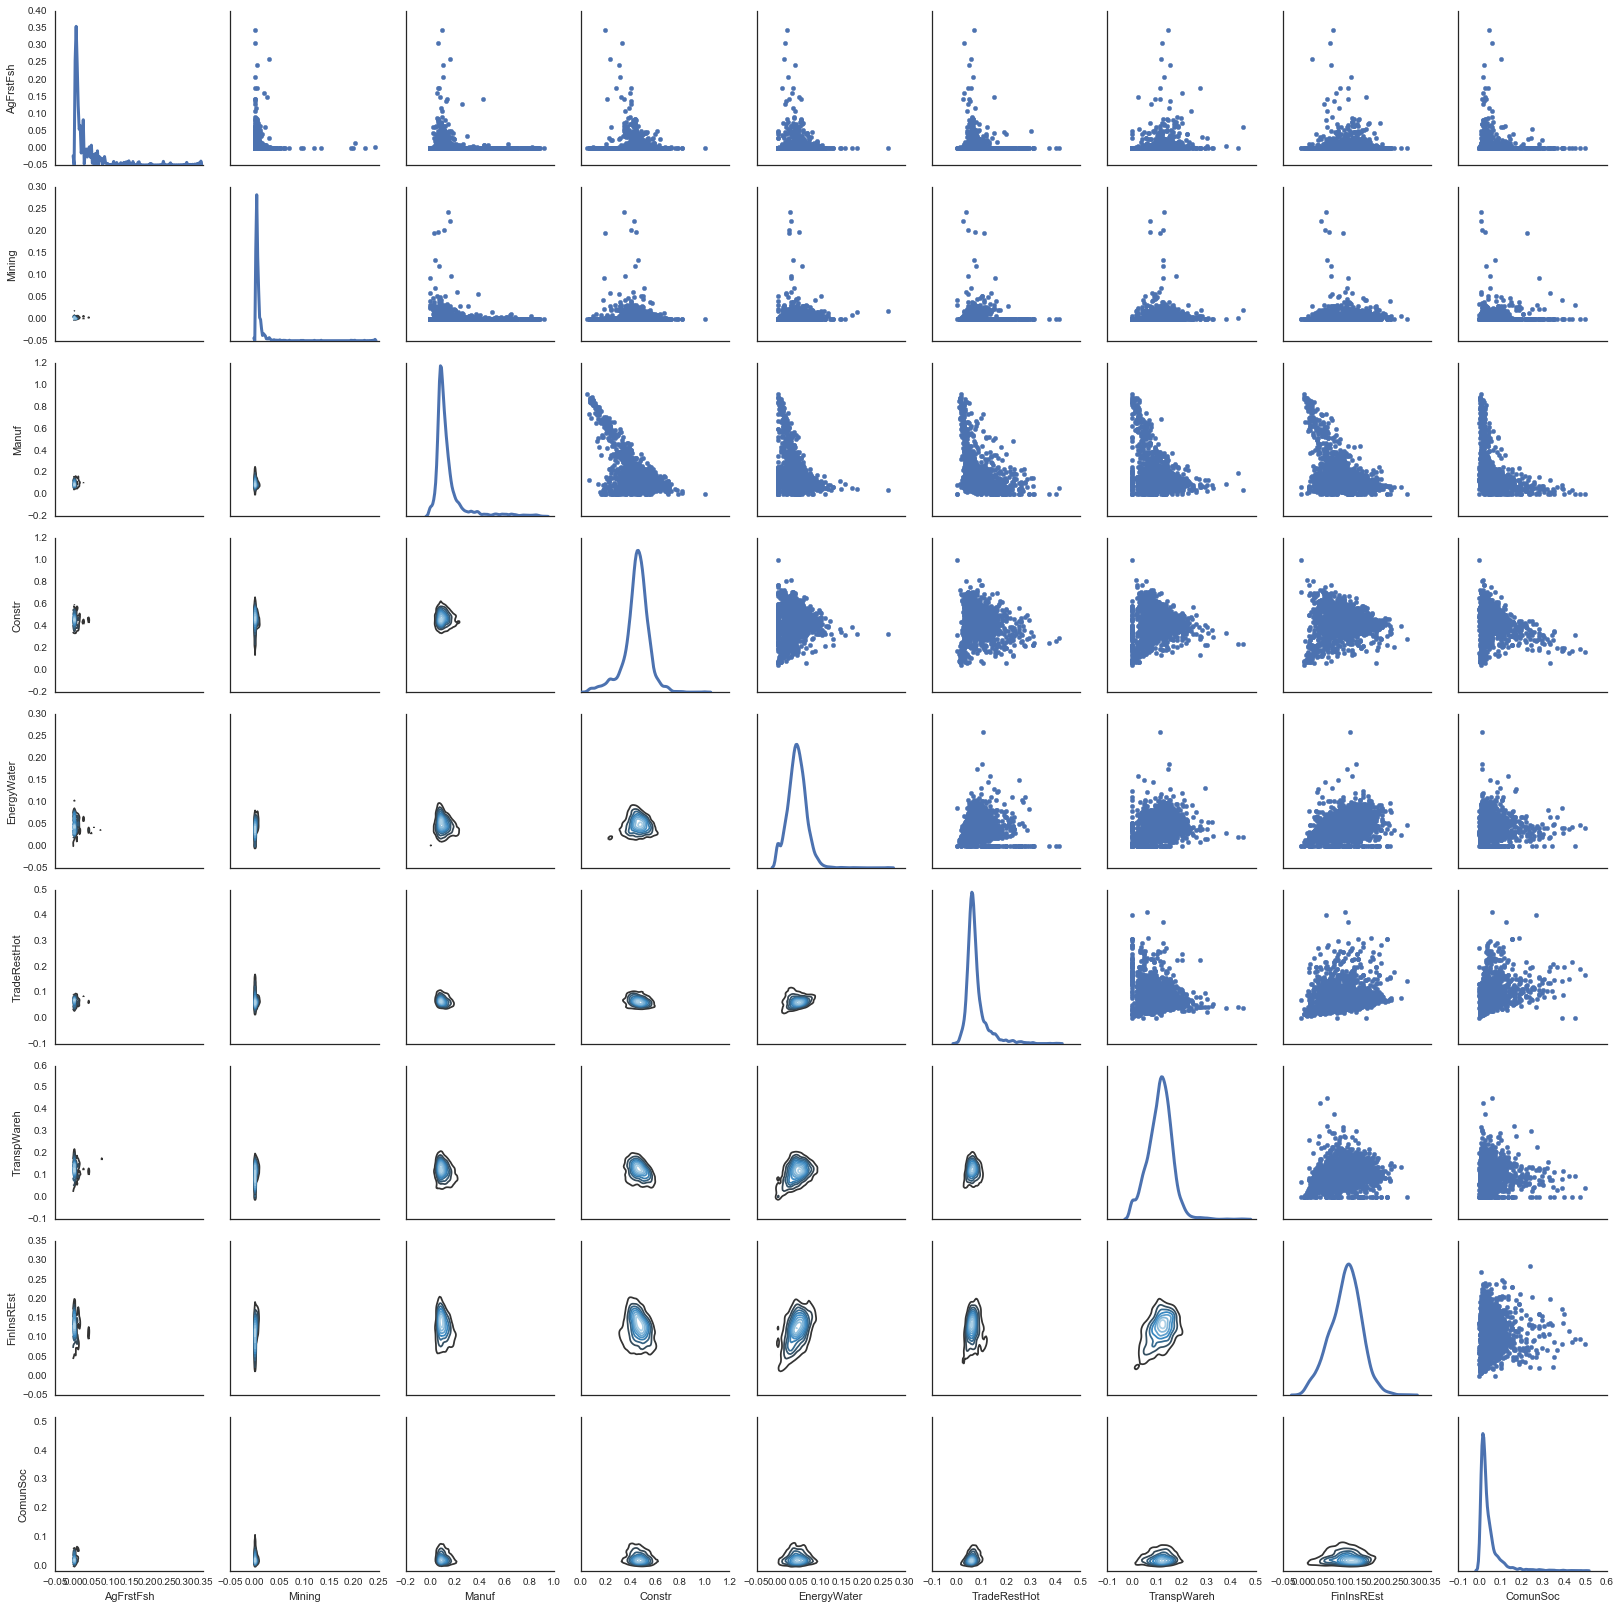

,AgFrstFsh,Mining,Manuf,Constr,EnergyWater,TradeRestHot,TranspWareh,FinInsREst,ComunSoc
AgFrstFsh,1.000000,0.007499,-0.063864,-0.104488,-0.058454,-0.055719,0.107989,-0.006219,-0.008739
Mining,0.007499,1.000000,-0.092622,-0.070032,0.057568,-0.038646,0.063413,0.041780,0.053493
Manuf,-0.063864,-0.092622,1.000000,-0.597952,-0.368962,-0.259127,-0.407513,-0.489302,-0.216999
Constr,-0.104488,-0.070032,-0.597952,1.000000,0.070588,-0.152728,0.026973,0.032857,-0.304717
EnergyWater,-0.058454,0.057568,-0.368962,0.070588,1.000000,-0.054372,0.274971,0.344313,-0.097087
TradeRestHot,-0.055719,-0.038646,-0.259127,-0.152728,-0.054372,1.000000,-0.259804,0.068767,0.385390
TranspWareh,0.107989,0.063413,-0.407513,0.026973,0.274971,-0.259804,1.000000,0.260221,-0.112862
FinInsREst,-0.006219,0.041780,-0.489302,0.032857,0.344313,0.068767,0.260221,1.000000,-0.059068
ComunSoc,-0.008739,0.053493,-0.216999,-0.304717,-0.097087,0.385390,-0.112862,-0.059068,1.000000


In [81]:
c=h.groupby([1000*h.cve_ent+h.cve_mun,h.Sector]).size().to_frame(name = 'num')
c=c.unstack('Sector')
c=c.fillna(0)
c=c['num']
c=c.apply(lambda x: x / sum(x), axis=1)
c.columns=['AgFrstFsh','Mining','Manuf','Constr','EnergyWater','TradeRestHot','TranspWareh','FinInsREst','ComunSoc'] 
sns.set(style="white")
g = sns.PairGrid(c, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()
print('\n')
c.corr()

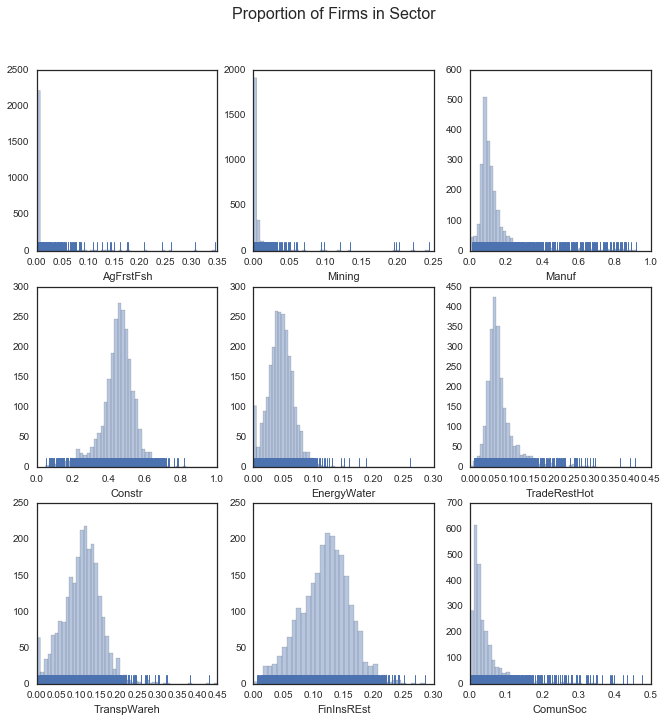

In [83]:
fig, axes = plt.subplots(3,3,figsize=(11,11))
fig.suptitle("Proportion of Firms in Sector", fontsize=16)
sns.distplot(c.AgFrstFsh,ax=axes[0,0],kde=False, rug=True)
sns.distplot(c.Mining,ax=axes[0,1],kde=False, rug=True)
sns.distplot(c.Manuf,ax=axes[0,2],kde=False, rug=True)
sns.distplot(c.Constr,ax=axes[1,0],kde=False, rug=True)
sns.distplot(c.EnergyWater,ax=axes[1,1],kde=False, rug=True)
sns.distplot(c.TradeRestHot,ax=axes[1,2],kde=False, rug=True)
sns.distplot(c.TranspWareh,ax=axes[2,0],kde=False, rug=True)
sns.distplot(c.FinInsREst,ax=axes[2,1],kde=False, rug=True)
sns.distplot(c.ComunSoc,ax=axes[2,2],kde=False, rug=True)
plt.show()

Intersectoral Scatter Plots for Employment Level 1




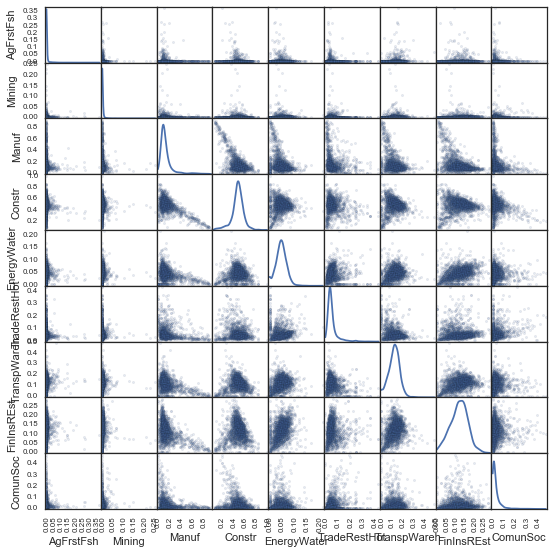



Intersectoral Scatter Plots for Employment Level 2




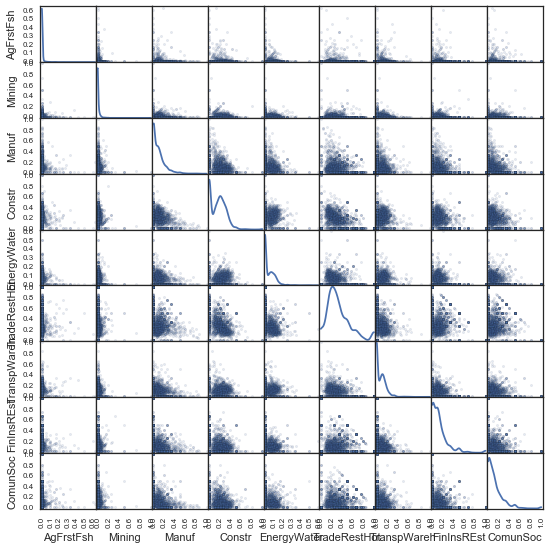



Intersectoral Scatter Plots for Employment Level 3




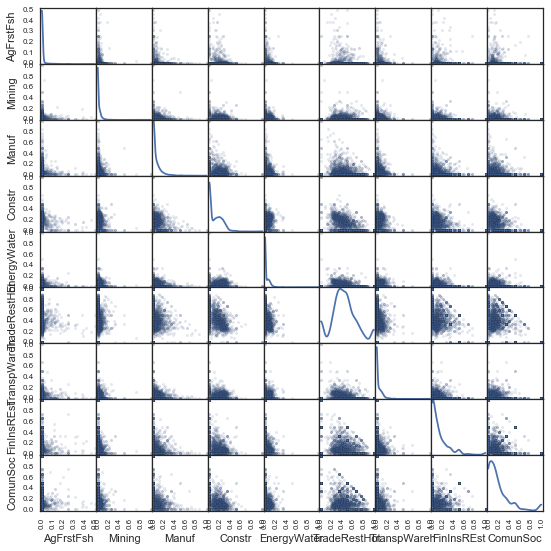



Intersectoral Scatter Plots for Employment Level 4




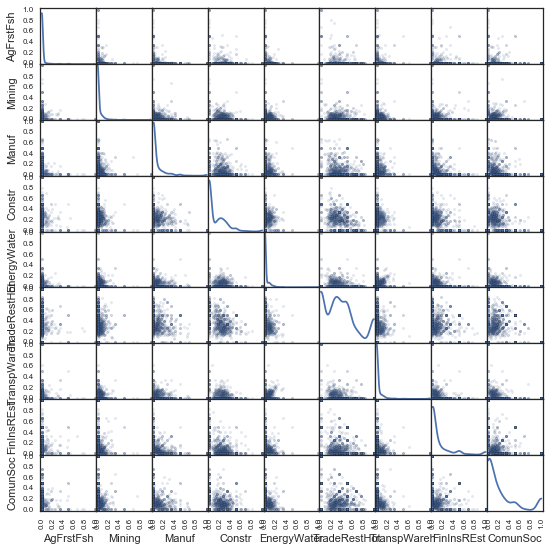



Intersectoral Scatter Plots for Employment Level 5




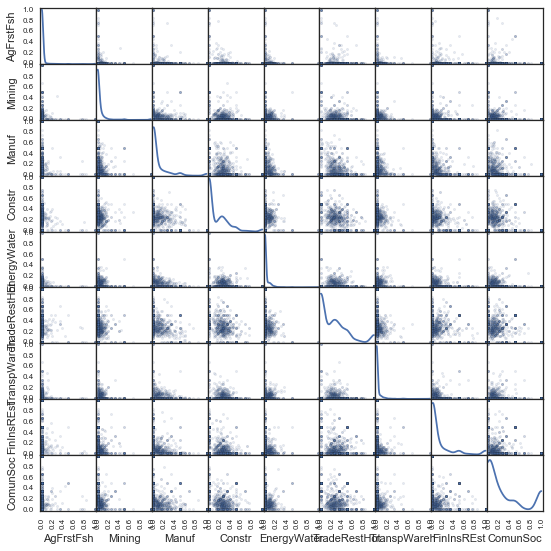



Intersectoral Scatter Plots for Employment Level 6




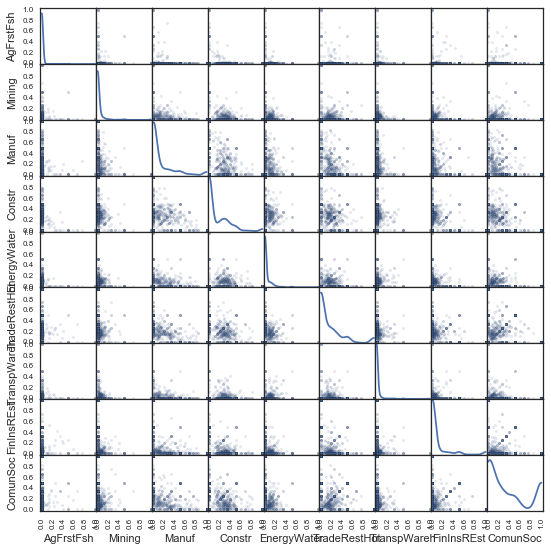



Intersectoral Scatter Plots for Employment Level 7




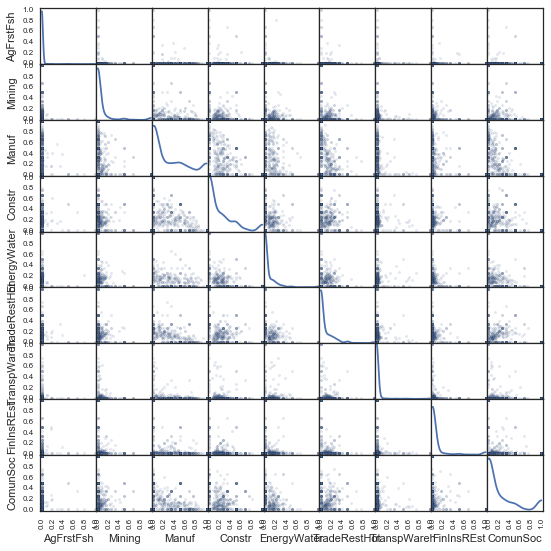

In [85]:
#Todos los sectores en nivel de empleo jj
for jj in range(7) :
    jj=jj+1
    c=h[h.EmpLevel==jj].groupby([1000*h.cve_ent+h.cve_mun,h.Sector]).size().to_frame(name = 'num')
    c=c.unstack('Sector')
    c=c.fillna(0)
    c=c['num']
    c=c.apply(lambda x: x / sum(x), axis=1)
    c.columns=['AgFrstFsh','Mining','Manuf','Constr','EnergyWater','TradeRestHot','TranspWareh','FinInsREst','ComunSoc'] 
    print('Intersectoral Scatter Plots for Employment Level '+str(jj))
    print('\n')
    sns.set(style="white")
    q=scatter_matrix(c, alpha=0.15, figsize=(9,9), diagonal='kde')    
    plt.show();
    print('\n')
    

In [86]:
#Todos los sectores en nivel de empleo jj
#Correlation Matrices
for jj in range(7) :
    jj=jj+1
    c=h[h.EmpLevel==jj].groupby([1000*h.cve_ent+h.cve_mun,h.Sector]).size().to_frame(name = 'num')
    c=c.unstack('Sector')
    c=c.fillna(0)
    c=c['num']
    c=c.apply(lambda x: x / sum(x), axis=1)
    c.columns=['AgFrstFsh','Mining','Manuf','Constr','EnergyWater','TradeRestHot','TranspWareh','FinInsREst','ComunSoc'] 
    print('Intersectoral Correlation Matrix for Employment Level '+str(jj))
    print('\n')
    print(c.corr());
    print('\n')
    

Intersectoral Correlation Matrix for Employment Level 1


              AgFrstFsh    Mining     Manuf    Constr  EnergyWater  \
AgFrstFsh      1.000000  0.003931 -0.051386 -0.102871    -0.054782   
Mining         0.003931  1.000000 -0.062819 -0.047288     0.012608   
Manuf         -0.051386 -0.062819  1.000000 -0.627665    -0.384462   
Constr        -0.102871 -0.047288 -0.627665  1.000000     0.053809   
EnergyWater   -0.054782  0.012608 -0.384462  0.053809     1.000000   
TradeRestHot  -0.047830 -0.027302 -0.158052 -0.156847    -0.036312   
TranspWareh    0.100360  0.036489 -0.421110  0.007710     0.246524   
FinInsREst    -0.007113  0.015021 -0.489027  0.009860     0.371181   
ComunSoc      -0.020912  0.030448 -0.190403 -0.257428    -0.046021   

              TradeRestHot  TranspWareh  FinInsREst  ComunSoc  
AgFrstFsh        -0.047830     0.100360   -0.007113 -0.020912  
Mining           -0.027302     0.036489    0.015021  0.030448  
Manuf            -0.158052    -0.421110   -0.4890

In [88]:
#Todos los sectores en nivel de empleo 2
c.corr()

,AgFrstFsh,Mining,Manuf,Constr,EnergyWater,TradeRestHot,TranspWareh,FinInsREst,ComunSoc
AgFrstFsh,1.000000,-0.042238,-0.079021,-0.028840,-0.033716,-0.034894,-0.026060,-0.024949,-0.044015
Mining,-0.042238,1.000000,-0.177423,-0.133886,-0.062763,-0.073470,-0.052549,-0.088187,-0.136978
Manuf,-0.079021,-0.177423,1.000000,-0.298292,-0.107781,-0.178741,-0.132188,-0.194205,-0.386423
Constr,-0.028840,-0.133886,-0.298292,1.000000,-0.088168,-0.056463,-0.062118,-0.160680,-0.261124
EnergyWater,-0.033716,-0.062763,-0.107781,-0.088168,1.000000,-0.002090,0.025353,-0.087532,-0.152929
TradeRestHot,-0.034894,-0.073470,-0.178741,-0.056463,-0.002090,1.000000,-0.027413,-0.107227,-0.115334
TranspWareh,-0.026060,-0.052549,-0.132188,-0.062118,0.025353,-0.027413,1.000000,-0.055772,-0.088591
FinInsREst,-0.024949,-0.088187,-0.194205,-0.160680,-0.087532,-0.107227,-0.055772,1.000000,-0.153044
ComunSoc,-0.044015,-0.136978,-0.386423,-0.261124,-0.152929,-0.115334,-0.088591,-0.153044,1.000000


C:\Users\DavidMayerF\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\DavidMayerF\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


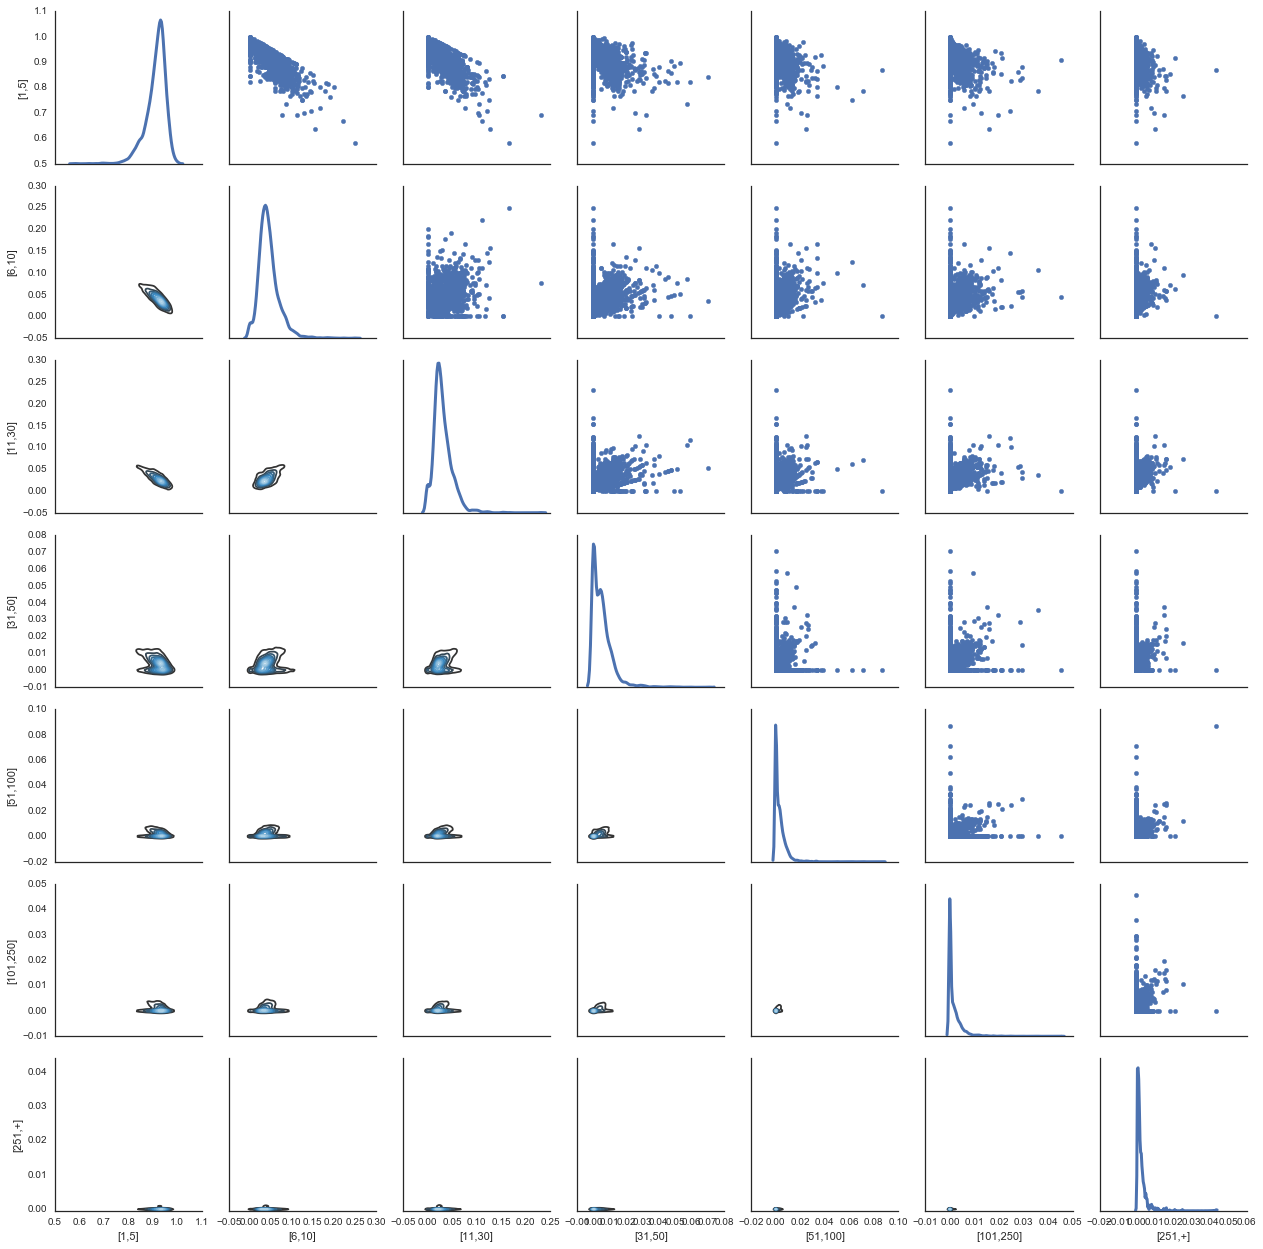

,"[1,5]","[6,10]","[11,30]","[31,50]","[51,100]","[101,250]","[251,+]"
"[1,5]",1.000000,-0.827334,-0.749695,-0.384337,-0.361490,-0.339884,-0.323183
"[6,10]",-0.827334,1.000000,0.335334,0.156649,0.197999,0.145469,0.136582
"[11,30]",-0.749695,0.335334,1.000000,0.199670,0.145569,0.224204,0.194605
"[31,50]",-0.384337,0.156649,0.199670,1.000000,0.093485,0.206266,0.197984
"[51,100]",-0.361490,0.197999,0.145569,0.093485,1.000000,0.171846,0.359126
"[101,250]",-0.339884,0.145469,0.224204,0.206266,0.171846,1.000000,0.280462
"[251,+]",-0.323183,0.136582,0.194605,0.197984,0.359126,0.280462,1.000000


In [89]:
c=h.groupby([1000*h.cve_ent+h.cve_mun,h.EmpLevel]).size().to_frame(name = 'num')
c=c.unstack('EmpLevel')
c=c.fillna(0)
c=c['num']
c=c.apply(lambda x: x / sum(x), axis=1)
c.columns=['[1,5]','[6,10]','[11,30]','[31,50]','[51,100]','[101,250]','[251,+]']  
sns.set(style="white")
g = sns.PairGrid(c, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()
print('\n')
c.corr()

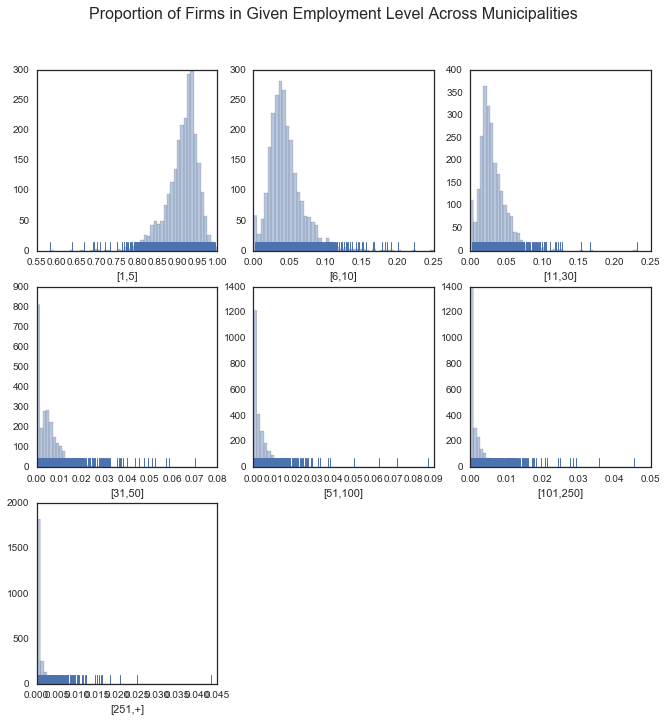

In [90]:
fig, axes = plt.subplots(3,3,figsize=(11,11))
fig.suptitle("Proportion of Firms in Given Employment Level Across Municipalities", fontsize=16)
sns.distplot(c.ix[:,0],ax=axes[0,0],kde=False, rug=True)
sns.distplot(c.ix[:,1],ax=axes[0,1],kde=False, rug=True)
sns.distplot(c.ix[:,2],ax=axes[0,2],kde=False, rug=True)
sns.distplot(c.ix[:,3],ax=axes[1,0],kde=False, rug=True)
sns.distplot(c.ix[:,4],ax=axes[1,1],kde=False, rug=True)
sns.distplot(c.ix[:,5],ax=axes[1,2],kde=False, rug=True)
sns.distplot(c.ix[:,6],ax=axes[2,0],kde=False, rug=True)
axes[2,1].get_xaxis().set_visible(False)
axes[2,1].get_yaxis().set_visible(False)
axes[2,2].get_xaxis().set_visible(False)
axes[2,2].get_yaxis().set_visible(False)
axes[2,1].axis('off')
axes[2,2].axis('off')
#fig.patch.set_visible(False)


plt.show()

Intersectoral Scatter Plots  for Agriculture, Forestry and Fishing (AgFrstFsh)




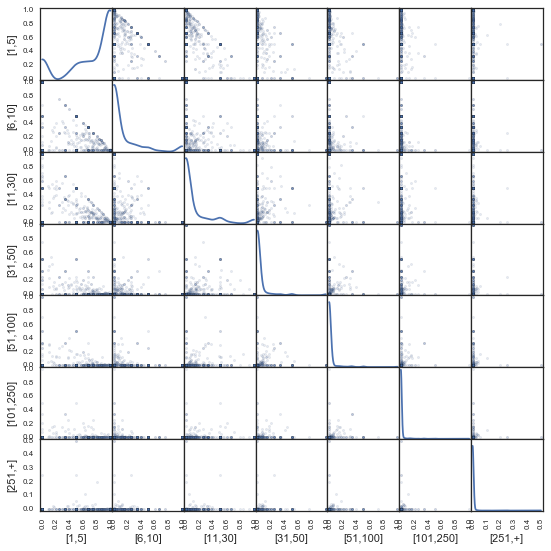



Intersectoral Scatter Plots  for Mining




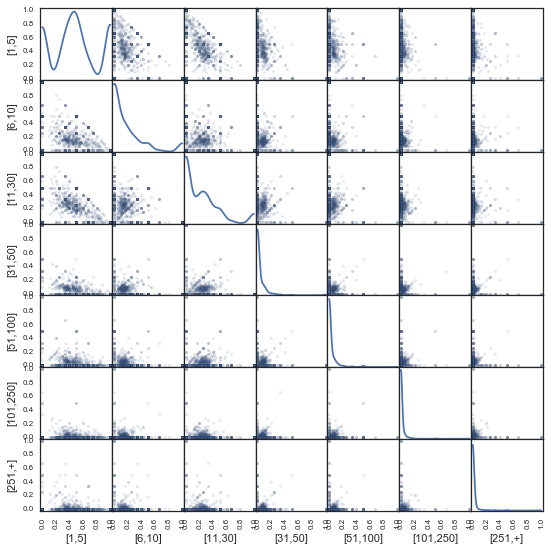



Intersectoral Scatter Plots  for Manufacturing




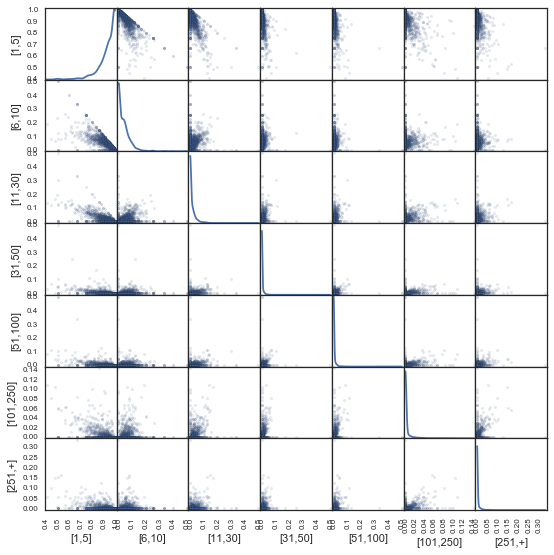



Intersectoral Scatter Plots  for Construction




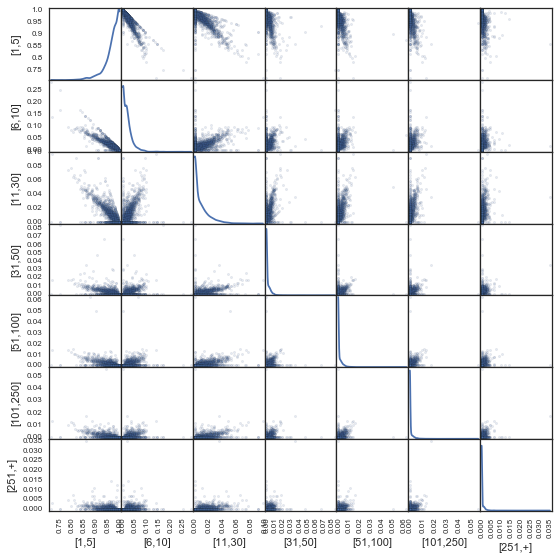



Intersectoral Scatter Plots  for Electricity, Gas and Potable Water (EnergyWater)




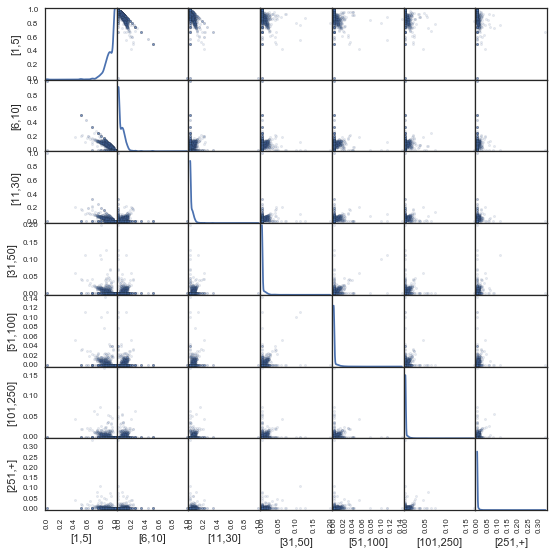



Intersectoral Scatter Plots  for Trade, Restaurants and Hotels (TradeRestHot)




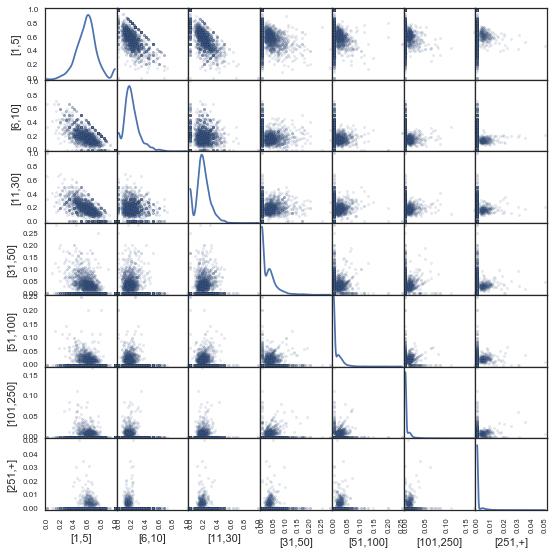



Intersectoral Scatter Plots  for Transport and Warehousing (TranspWareh)




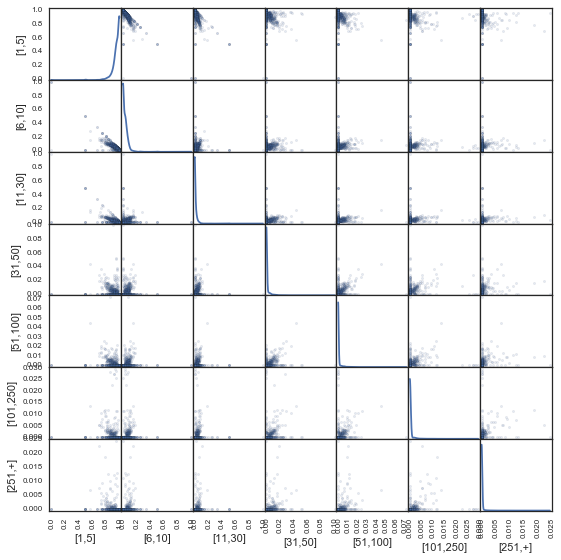



Intersectoral Scatter Plots  for Finance, Insurance and Real Estate (FinInsREst)




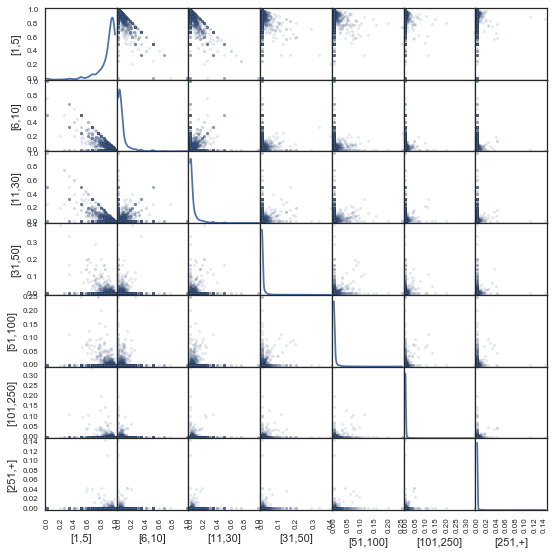



Intersectoral Scatter Plots  for Comunal and Social Services (ComunSoc)




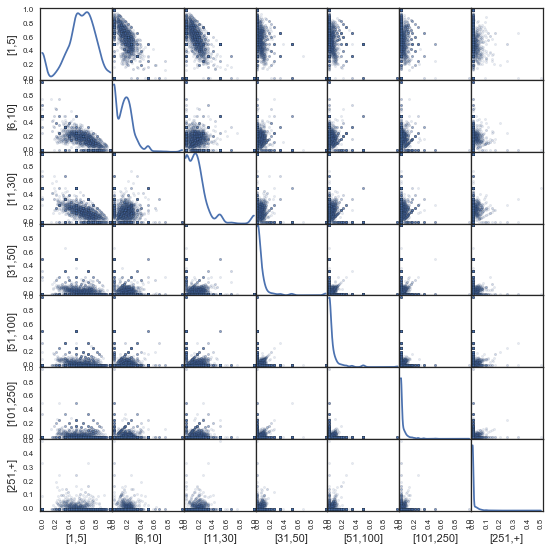

In [92]:
#Todos los sectores en nivel de empleo jj
for jj in range(9) :
    jj=jj+1
    c=h[h.Sector==jj].groupby([1000*h.cve_ent+h.cve_mun,h.EmpLevel]).size().to_frame(name = 'num')
    c=c.unstack('EmpLevel')
    c=c.fillna(0)
    c=c['num']
    c=c.apply(lambda x: x / sum(x), axis=1)
    c.columns=['[1,5]','[6,10]','[11,30]','[31,50]','[51,100]','[101,250]','[251,+]']  
    sns.set(style="white")
    print('Intersectoral Scatter Plots  for '+s[jj])
    print('\n')
    sns.set(style="white")
    q=scatter_matrix(c, alpha=0.15, figsize=(9,9), diagonal='kde')    
    plt.show();
    print('\n')
    

In [93]:
#Todos los niveles de empleo en sectores jj
#Correlation Matrices
for jj in range(9) :
    jj=jj+1
    c=h[h.Sector==jj].groupby([1000*h.cve_ent+h.cve_mun,h.EmpLevel]).size().to_frame(name = 'num')
    c=c.unstack('EmpLevel')
    c=c.fillna(0)
    c=c['num']
    c=c.apply(lambda x: x / sum(x), axis=1)
    c.columns=['[1,5]','[6,10]','[11,30]','[31,50]','[51,100]','[101,250]','[251,+]']  
    print('Inter Employment Level Correlation Matrix for '+s[jj])
    print('\n')
    print(c.corr());
    print('\n')
    

Inter Employment Level Correlation Matrix for Agriculture, Forestry and Fishing (AgFrstFsh)


              [1,5]    [6,10]   [11,30]   [31,50]  [51,100]  [101,250]  \
[1,5]      1.000000 -0.552099 -0.571989 -0.370604 -0.253524  -0.139816   
[6,10]    -0.552099  1.000000 -0.142950 -0.081947 -0.053753  -0.059141   
[11,30]   -0.571989 -0.142950  1.000000  0.029607  0.008204   0.015610   
[31,50]   -0.370604 -0.081947  0.029607  1.000000  0.029884   0.023090   
[51,100]  -0.253524 -0.053753  0.008204  0.029884  1.000000   0.099351   
[101,250] -0.139816 -0.059141  0.015610  0.023090  0.099351   1.000000   
[251,+]   -0.045425 -0.028395 -0.011055 -0.001840 -0.005737   0.001702   

            [251,+]  
[1,5]     -0.045425  
[6,10]    -0.028395  
[11,30]   -0.011055  
[31,50]   -0.001840  
[51,100]  -0.005737  
[101,250]  0.001702  
[251,+]    1.000000  


Inter Employment Level Correlation Matrix for Mining


              [1,5]    [6,10]   [11,30]   [31,50]  [51,100]  [101,250]  \
[1,5] 

In [94]:
h.describe()

,codigo_act,cve_ent,cve_mun,EmpLevel,Sector
count,4.924092e+06,4.924092e+06,4.924092e+06,4.924092e+06,4.924092e+06
mean,5.539830e+05,1.645805e+01,5.227991e+01,1.220555e+00,5.144909e+00
std,1.631460e+05,7.728507e+00,6.621317e+01,7.098380e-01,1.756683e+00
min,1.125110e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,4.611100e+05,1.100000e+01,1.300000e+01,1.000000e+00,4.000000e+00
50%,4.662120e+05,1.500000e+01,3.300000e+01,1.000000e+00,4.000000e+00
75%,7.225130e+05,2.100000e+01,7.000000e+01,1.000000e+00,7.000000e+00
max,9.321100e+05,3.200000e+01,5.700000e+02,7.000000e+00,9.000000e+00


In [97]:
h.to_csv('D16_v2.csv')